<a href="https://colab.research.google.com/github/BRAYAN142002/MineriaDeDatos-webScraping/blob/main/MD_Web_scraping_pagina_Estatica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBTENCIÓN DE LA NOTICIA**

In [ ]:
#Importamos las librerias necesarias para poder realizar web scraping con la url de pagina en la que vamos a indagar.
import requests
from bs4 import BeautifulSoup

In [ ]:
#Definimos una funcion que me permite obtener las sesiones de la url indicada
def get_session(url):
    """
    Establece una sesión para la página proporcionada y devuelve la sesión y su contenido.
    """
    session = requests.Session()
    response = session.get(url)
    response.raise_for_status()  # Verifica si la solicitud fue exitosa
    return session, response.text

In [ ]:
#Definimos una funcion que obtiene los links del contenido html de la pagina indicada
def extract_links(html_content):
    """
    Extrae todos los enlaces de la página proporcionada.
    """
    soup = BeautifulSoup(html_content, 'html.parser')
    links = [a['href'] for a in soup.find_all('a', href=True)]
    return links

In [ ]:
#Establecemos una funcion que recibe como parametro la sesion y los links para obtener el texto correspondiente de cada link
def extract_text_from_links(session, links):
    """
    Visita cada enlace extraído y obtiene el texto sin etiquetas.
    """
    texts = []
    for link in links:
        try:
            response = session.get(link)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')
            text = soup.get_text(strip=True)
            texts.append((link, text))
        except requests.exceptions.RequestException as e:
            print(f"Error al procesar el enlace {link}: {e}")
    return texts

In [ ]:
#Indicamos la url de la pagina de noticias en donde vamos a obtener el parrafo
url = "https://www.elespectador.com/tecnologia/gadgets-y-apps/estos-son-los-10-mejores-videojuegos-moviles-gratis-para-celular-de-2024/"

In [ ]:
#El siguiente bloque de codigo permite obtener la noticia de la pagina indicada
try:
    # Realiza la solicitud GET a la URL
    response = requests.get(url)
    response.raise_for_status()  # Verifica si la solicitud fue exitosa

    # Analiza el contenido HTML de la página
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extrae el título de la noticia
    title = soup.find('h1', class_='Title').get_text(strip=True)

    # Extrae la fecha de publicación
    date = soup.find('div', class_='Datetime').get_text(strip=True)

    # Extrae el contenido de la noticia
    content = soup.find('div', class_='Article').get_text(strip=True)

    # Muestra la información extraída
    print(f"Título: {title}")
    print(f"Fecha: {date}")
    print("Contenido:")
    print(content)

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud: {e}")
except AttributeError:
    print("No se pudo extraer alguno de los elementos de la noticia.")

Título: Estos son los 10 mejores videojuegos móviles gratis para celular de 2024
Fecha: 10 de diciembre de 2024 - 11:30 p. m.
Contenido:
Existen analistas de esta industria que apuntan a que el mercado de los celulares terminará por remplazar en su totalidad al de las consolas portátiles.Foto: PexelsResume e infórmame rápidoEscucha este artículoAudio generado con IA de Google0:00/0:001xLos videojuegos son una industria desde hace más de 50 años, comenzando por los arcades o salones de juego y siguiendo con las consolas de sobremesa. Sin embargo, desde hace tres décadas los teléfonos móviles se convirtieron en una alternativa viable paras jugar títulos. Además, sin proponérselo, rivalizaron con el segmento de las consolas portátiles, popularizado por la Nintendo Game Boy en 1989, cuando sus prestaciones técnicas y gráficas los pusieron a la par de un sistema de juegos de bolsillo.Vínculos relacionadosGuía de compra: estas son las consolas y videojuegos que puede regalar en NavidadFortni

In [ ]:
#El siguiente bloque de codigo permite obtener la sesion de la pagina
try:
    # Obtenemos la sesión y el contenido HTML de la página principal
    session, html_content = get_session(url)

    # Extraemos los enlaces de la página
    links = extract_links(html_content)
    print("\nEnlaces extraídos:")
    for link in links:
        print(link)

    # Extrae el texto de cada enlace
    texts_from_links = extract_text_from_links(session, links)
    print("\nTextos de los enlaces:")
    for link, text in texts_from_links:
        print(f"Enlace: {link}")
        print(f"Texto: {text[:200]}...\n")  # Muestra los primeros 200 caracteres de texto

except requests.exceptions.RequestException as e:
    print(f"Error al realizar la solicitud: {e}")


Enlaces extraídos:
/newsletters/?utm_source=interno&utm_medium=boton&utm_campaign=menu_hamburguesa&utm_content=boton_menu_hamburguesa
/contenido-patrocinado/?utm_source=interno&utm_medium=boton&utm_campaign=menu_hamburguesa&utm_content=boton_menu_hamburguesa
/ultimas-noticias-colombia/?utm_source=interno&utm_medium=boton&utm_campaign=menu_hamburguesa&utm_content=boton_menu_hamburguesa
/politica/?utm_source=interno&utm_medium=boton&utm_campaign=menu_hamburguesa&utm_content=boton_menu_hamburguesa
https://congresoalamano.elespectador.com/?utm_source=interno&utm_medium=boton&utm_campaign=menu_hamburguesa&utm_content=boton_menu_hamburguesa
/judicial/?utm_source=interno&utm_medium=boton&utm_campaign=menu_hamburguesa&utm_content=boton_menu_hamburguesa
/economia/?utm_source=interno&utm_medium=boton&utm_campaign=menu_hamburguesa&utm_content=boton_menu_hamburguesa
/economia/finanzas-personales/?utm_source=interno&utm_medium=boton&utm_campaign=menu_hamburguesa&utm_content=boton_menu_hamburguesa


# **ENTRENAMIENTO DEL MODELO**

In [ ]:
#Importamos las librerias necesarias para realizar el respectivo entrenamiento del modelo y el prepocesamiento del texto
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import string
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# --- Configuración global ---
STOPWORDS = set()
STEMMER = SnowballStemmer("spanish")

In [ ]:
# --- Definimos una función para cargar stopwords desde un archivo ---
def load_stopwords(file_path):
    global STOPWORDS
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            STOPWORDS = set(word.strip() for word in file.readlines())
    except FileNotFoundError:
        print(f"Archivo de stopwords no encontrado: {file_path}")

In [ ]:
# --- Definimos una función para preprocesar el texto ---
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Eliminar stopwords
    tokens = [word for word in tokens if word not in STOPWORDS]
    # Aplicar stemming
    tokens = [STEMMER.stem(word) for word in tokens]
    return ' '.join(tokens)

In [ ]:
# --- Función para cargar datos de entrenamiento desde carpetas ---
def load_training_data(data_dir):
    texts = []
    labels = []
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for filename in os.listdir(category_path):
                file_path = os.path.join(category_path, filename)
                if filename.endswith('.txt'):
                    with open(file_path, 'r', encoding='utf-8') as file:
                        text = file.read()
                        texts.append(preprocess_text(text))
                        labels.append(category)
    return texts, labels


In [ ]:
# --- Función para entrenar el modelo de clasificación ---
def train_classifier(data_dir):
    texts, labels = load_training_data(data_dir)

    # Crear pipeline de preprocesamiento y clasificación
    model = make_pipeline(
        TfidfVectorizer(),
        MultinomialNB()
    )
    model.fit(texts, labels)
    return model, texts, labels

In [ ]:
# --- Función para clasificar una noticia ---
def classify_news(model, content):
    processed_content = preprocess_text(content)
    category = model.predict([processed_content])[0]
    return category


In [ ]:
# --- Función para calcular métricas ---
def evaluate_model(model, texts, labels):
    predictions = model.predict(texts)
    print("\n--- Métricas del modelo ---")
    print(f"Accuracy: {accuracy_score(labels, predictions):.4f}")
    print("\nClassification Report:")
    print(classification_report(labels, predictions))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(labels, predictions)
    plot_confusion_matrix(cm, model.classes_)

In [ ]:
# --- Función para graficar la matriz de confusión ---
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


--- Métricas del modelo ---
Accuracy: 0.9556

Classification Report:
              precision    recall  f1-score   support

     Deporte       1.00      1.00      1.00        15
    Politica       0.91      1.00      0.95        20
  Tecnologia       1.00      0.80      0.89        10

    accuracy                           0.96        45
   macro avg       0.97      0.93      0.95        45
weighted avg       0.96      0.96      0.95        45


Confusion Matrix:


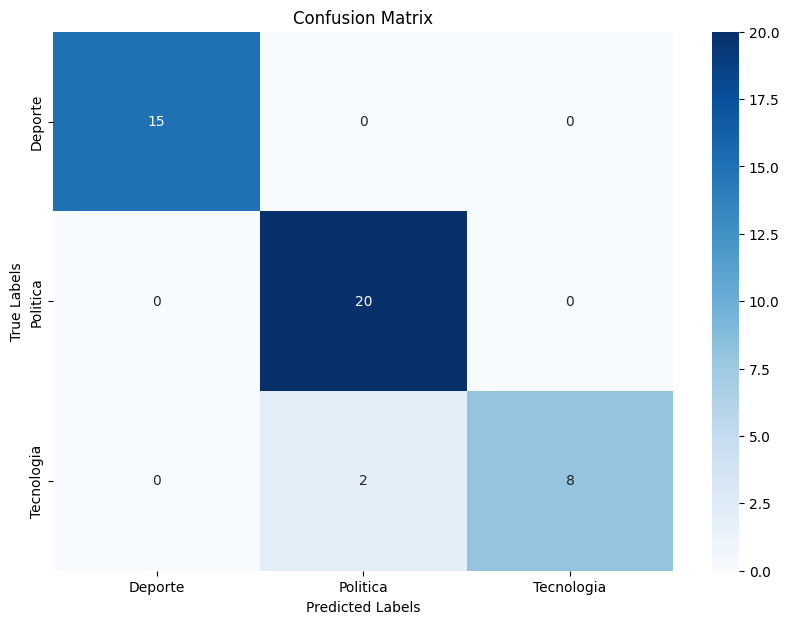


La noticia pertenece a la categoría: Politica


In [ ]:
# Ruta al archivo de stopwords
stopwords_file = "/content/drive/MyDrive/Mineria de datos/dictionary/spanish-stop-words-sin-tildes.txt"
load_stopwords(stopwords_file)

# Directorio con datos de entrenamiento
training_data_dir = "/content/drive/MyDrive/Mineria de datos/trainingdata"

# Entrenar el modelo
model, train_texts, train_labels = train_classifier(training_data_dir)

# Evaluar el modelo
evaluate_model(model, train_texts, train_labels)

# Clasificar una noticia nueva
sample_news = "Texto de ejemplo de una noticia para clasificar."
category = classify_news(model, content)
print(f"\nLa noticia pertenece a la categoría: {category}")

# **CONCLUSIÓN**
El modelo presenta un accuracy del 95% aunque se observa en la matriz de confusion que hay algunos predicciones que no son acertadas, ademas, se deberia el modelo entrenar con mas datos y diferentes palabras para que las pueda predecir mejor.